## Data Analysis with R
### Data-Wrangling
#### Loading Libraries

In [2]:
#Loading some library
library(dplyr)
library(ggplot2)
library(yarrr)
library(ggcorrplot)

#### Loading Data

In [3]:
# Importing data
df = read.csv('raw_automobile_data.csv') 
# getting only 5 rows
head(df, 5)

symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
3,NA,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
3,NA,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9,111,5000,21,27,16500
1,NA,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9,154,5000,19,26,16500
2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10,102,5500,24,30,13950
2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8,115,5500,18,22,17450


#### Counting NA Values in All Columns of the Data Frame

In [4]:
colSums(is.na(df))

symboling normalized_losses              make         fuel_type 
                0                41                 0                 0 
       aspiration      num_of_doors        body_style      drive_wheels 
                0                 0                 0                 0 
  engine_location        wheel_base            length             width 
                0                 0                 0                 0 
           height       curb_weight       engine_type  num_of_cylinders 
                0                 0                 0                 0 
      engine_size       fuel_system              bore            stroke 
                0                 0                 4                 4 
compression_ratio        horsepower          peak_rpm          city_mpg 
                0                 2                 2                 0 
      highway_mpg             price 
                0                 4

#### We see that there are missing values as follows
 - There are 41 missing values in normalized-losses
 - There are 2 missing values in num-of-doors 
 - There are 4 missing values in bore
 - There are 4 missing values in stroke
 - There are 2 missing values in horsepower 
 - There are 2 missing values in peak-rpm 
 - There are 4 missing values in price

#### Deal with missing data

How to deal with missing data? What can we do?
1. drop data
 - drop the whole row
 - drop the whole column 
2. replace data
 - replace it by mean
 - replace it by frequency
 - replace it based on other functions

#### Here we want to predict car price. So can do the following:
Replace by mean for the numeric columns
 - "normalized_losses": 41 missing data, replace them with mean 
 - "stroke": 4 missing data, replace them with mean
 - "bore": 4 missing data, replace them with mean
 - "horsepower": 2 missing data, replace them with mean 
 - "peak_rpm": 2 missing data, replace them with mean

Replace by highest frequency for categorical column (replace by mostly repeated item)
 - "num_of_doors": 2 missing data, replace them with "four". Since four doors is most frequent, it is most likely to occur

Drop the whole row for the column to be predicted (do not use approximated values)
 - "price": 4 missing data, simply delete the whole row


#### normalized-losses

In [5]:
df$normalized_losses[is.na(df$normalized_losses)] <- mean(df$normalized_losses, na.rm = TRUE)

#### Stroke

In [6]:
df$stroke[is.na(df$stroke)] <- mean(df$stroke, na.rm = TRUE)

#### bore

In [7]:
df$bore[is.na(df$bore)] <- mean(df$bore, na.rm = TRUE)

#### horsepower

In [8]:
df$horsepower[is.na(df$horsepower)] <- mean(df$horsepower, na.rm = TRUE)

#### peak_rpm

In [9]:
df$peak_rpm[is.na(df$peak_rpm)] <- mean(df$peak_rpm, na.rm = TRUE)

#### num_of_doors

In [10]:
df$num_of_doors[is.na(df$num_of_doors)] <- 'four'

#### Deleting price

In [11]:
df <- na.omit(df)

In [12]:
head(df,5)

symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9,111,5000,21,27,16500
1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9,154,5000,19,26,16500
2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10,102,5500,24,30,13950
2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8,115,5500,18,22,17450


In [13]:
 # Again Checking for missing values:
colSums(is.na(df))

symboling normalized_losses              make         fuel_type 
                0                 0                 0                 0 
       aspiration      num_of_doors        body_style      drive_wheels 
                0                 0                 0                 0 
  engine_location        wheel_base            length             width 
                0                 0                 0                 0 
           height       curb_weight       engine_type  num_of_cylinders 
                0                 0                 0                 0 
      engine_size       fuel_system              bore            stroke 
                0                 0                 0                 0 
compression_ratio        horsepower          peak_rpm          city_mpg 
                0                 0                 0                 0 
      highway_mpg             price 
                0                 0

In [14]:
# Getting Dimension of data frame
dim(df)

[1] 201  26

In [15]:
nrow(df)

[1] 201

In [16]:
ncol(df)

[1] 26

#### structure of data


In [17]:
#Getting structure of data frame - name, type and preview of data in each column
str(df)

'data.frame':	201 obs. of  26 variables:
 $ symboling        : int  3 3 1 2 2 2 1 1 1 2 ...
 $ normalized_losses: num  122 122 122 164 164 122 158 122 158 192 ...
 $ make             : Factor w/ 22 levels "alfa-romero",..: 1 1 1 2 2 2 2 2 2 3 ...
 $ fuel_type        : Factor w/ 2 levels "diesel","gas": 2 2 2 2 2 2 2 2 2 2 ...
 $ aspiration       : Factor w/ 2 levels "std","turbo": 1 1 1 1 1 1 1 1 2 1 ...
 $ num_of_doors     : Factor w/ 3 levels "","four","two": 3 3 3 2 2 3 2 2 2 3 ...
 $ body_style       : Factor w/ 5 levels "convertible",..: 1 1 3 4 4 4 4 5 4 4 ...
 $ drive_wheels     : Factor w/ 3 levels "4wd","fwd","rwd": 3 3 3 2 1 2 2 2 2 3 ...
 $ engine_location  : Factor w/ 2 levels "front","rear": 1 1 1 1 1 1 1 1 1 1 ...
 $ wheel_base       : num  88.6 88.6 94.5 99.8 99.4 ...
 $ length           : num  169 169 171 177 177 ...
 $ width            : num  64.1 64.1 65.5 66.2 66.4 66.3 71.4 71.4 71.4 64.8 ...
 $ height           : num  48.8 48.8 52.4 54.3 54.3 53.1 55.7 55.7 55.9 54

In [18]:
# Summary statistics of all varibles in the data frame
 summary(df)

   symboling       normalized_losses         make     fuel_type   aspiration 
 Min.   :-2.0000   Min.   : 65       toyota    :32   diesel: 20   std  :165  
 1st Qu.: 0.0000   1st Qu.:101       nissan    :18   gas   :181   turbo: 36  
 Median : 1.0000   Median :122       mazda     :17                           
 Mean   : 0.8408   Mean   :122       honda     :13                           
 3rd Qu.: 2.0000   3rd Qu.:137       mitsubishi:13                           
 Max.   : 3.0000   Max.   :256       subaru    :12                           
                                     (Other)   :96                           
 num_of_doors       body_style drive_wheels engine_location   wheel_base   
     :  2     convertible: 6   4wd:  8      front:198       Min.   : 86.6  
 four:113     hardtop    : 8   fwd:118      rear :  3       1st Qu.: 94.5  
 two : 86     hatchback  :68   rwd: 75                      Median : 97.0  
              sedan      :94                                Mean   : 98.

In [19]:
# Summary statistics of a single varible in the data frame
summary(df$length)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  141.1   166.8   173.2   174.2   183.5   208.1 

#### Normalizing data

In [20]:
# Normalizing columns "length", "width" and "height" using scale() function
df$length<-scale(df$length, center = TRUE, scale = TRUE) 
df$width<-scale(df$width, center = TRUE, scale = TRUE) 
df$height<-scale(df$height, center = TRUE, scale = TRUE)
df[1:5,]

symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9,111,5000,21,27,16500
1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9,154,5000,19,26,16500
2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10,102,5500,24,30,13950
2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8,115,5500,18,22,17450


#### Exploratory-Data-Analysis

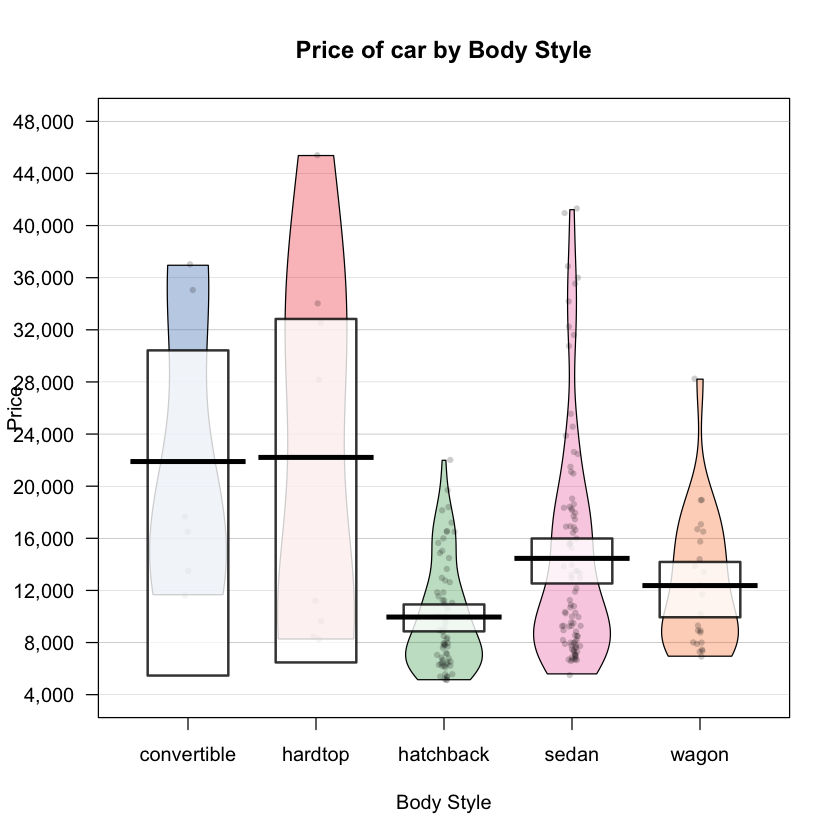

In [23]:
# Pirate Plot
 pirateplot(formula = price ~ body_style, data = df,
            main = "Price of car by Body Style", 
            xlab = "Body Style",
            ylab = 'Price',
            theme = 1)

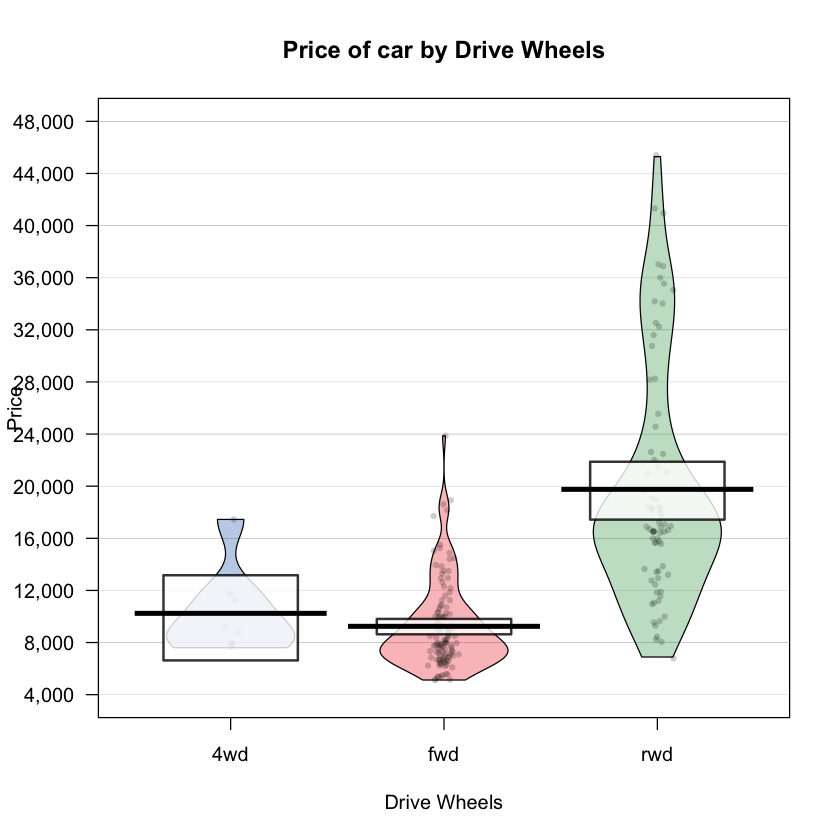

In [24]:
pirateplot(formula = price ~ drive_wheels, data = df,
           main = "Price of car by Drive Wheels", 
           xlab = "Drive Wheels",
           ylab = 'Price',
           theme = 1)
 

#### Bar plot

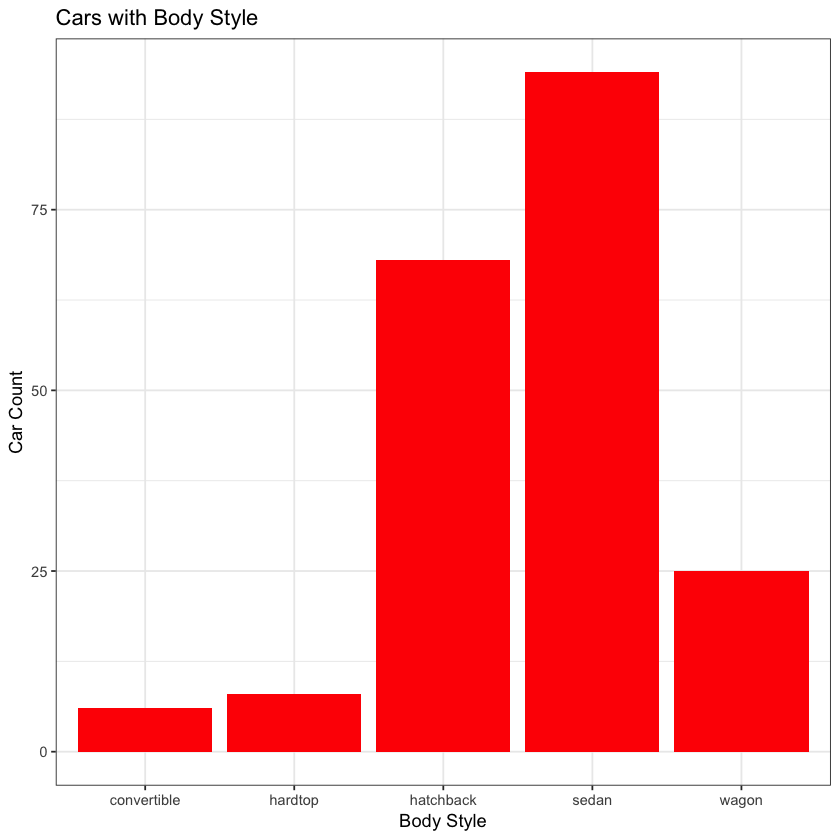

In [25]:
# Bar plot
ggplot(df, aes(x = body_style)) + geom_bar(fill = 'red') + 
      theme_bw()+
      labs(x = 'Body Style', y = 'Car Count', title = 'Cars with Body Style')

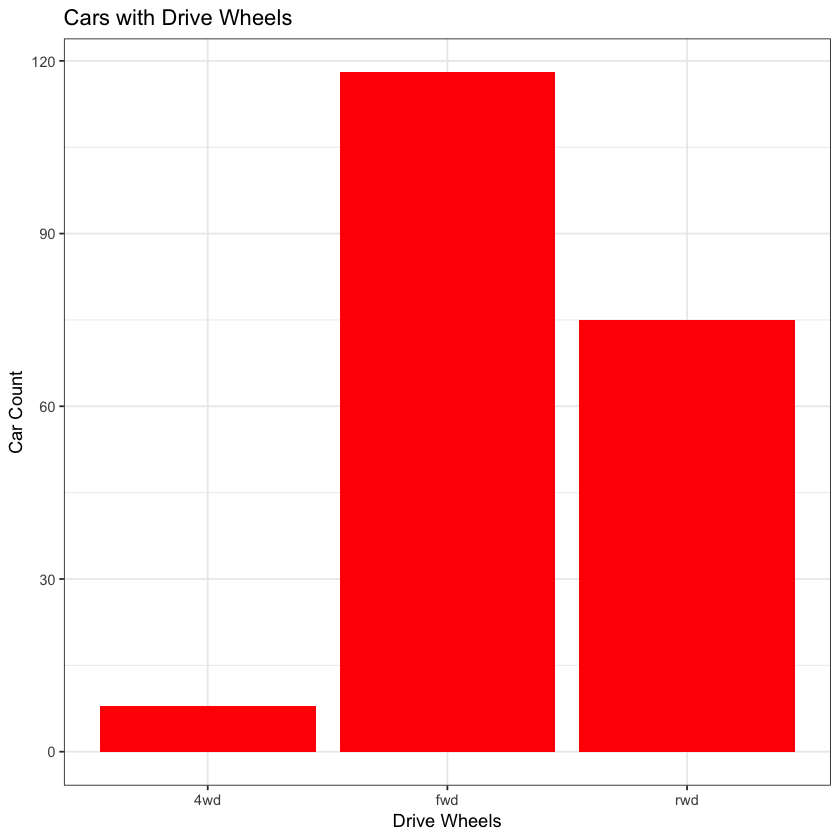

In [26]:
# Bar plot
ggplot(df, aes(x = drive_wheels)) + geom_bar(fill = 'red') + 
      theme_bw()+
      labs(x = 'Drive Wheels', y = 'Car Count', title = 'Cars with Drive Wheels')

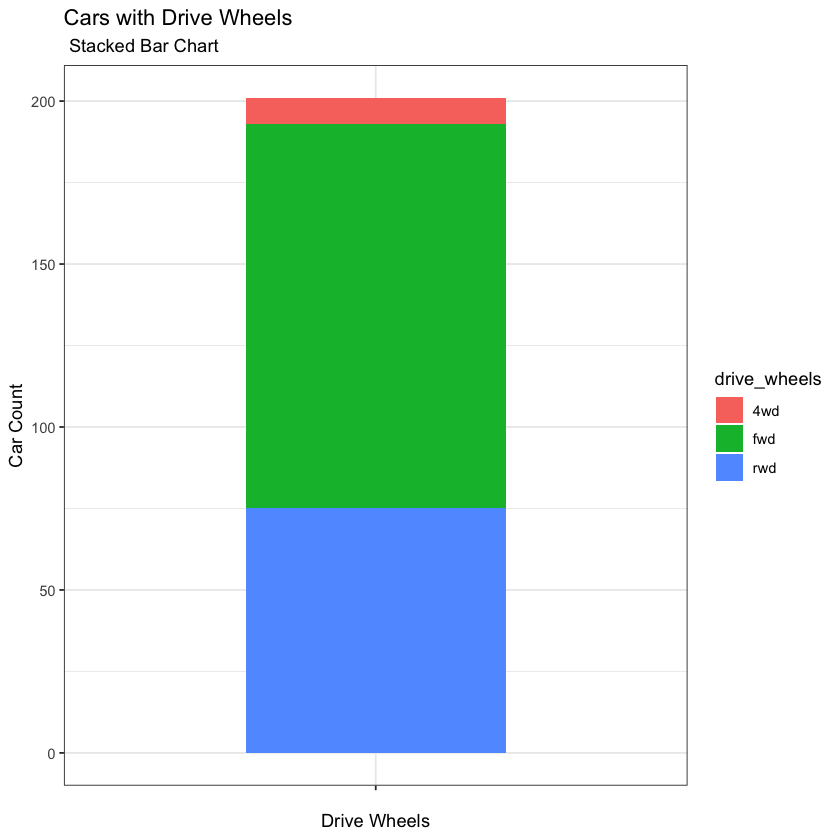

In [27]:
# Stacked Bar plot fill by another categorical variable
ggplot(df, aes(x = "", fill = drive_wheels)) + geom_bar(width = 0.5) + 
      theme_bw()+
      labs(x = 'Drive Wheels', y = 'Car Count',
           title = 'Cars with Drive Wheels', subtitle =' Stacked Bar Chart')
 

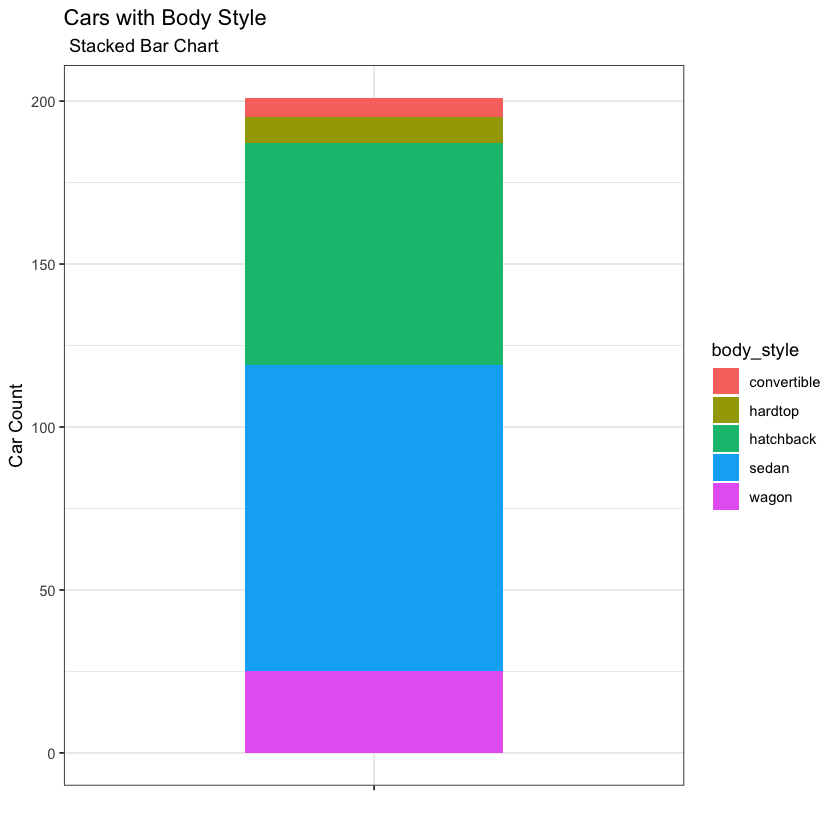

In [29]:
# Stacked Bar plot fill by another categorical variable
ggplot(df, aes(x = "", fill = body_style)) + geom_bar(width = 0.5) + 
       theme_bw()+
       labs(x = '', y = 'Car Count',
       title = 'Cars with Body Style', subtitle =' Stacked Bar Chart')
 

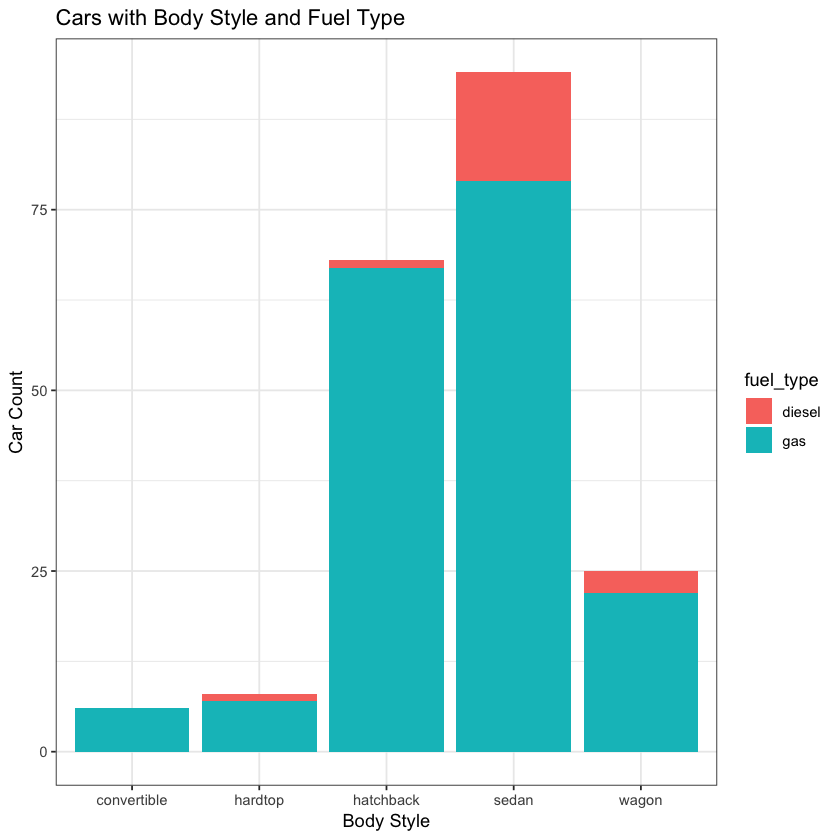

In [33]:
# Bar plot fill by another categorical variable
ggplot(df, aes(x = body_style, fill = fuel_type )) + geom_bar() +
       theme_bw()+
       labs(x = 'Body Style', y = 'Car Count', title = 'Cars with Body Style and Fuel Type' )
 

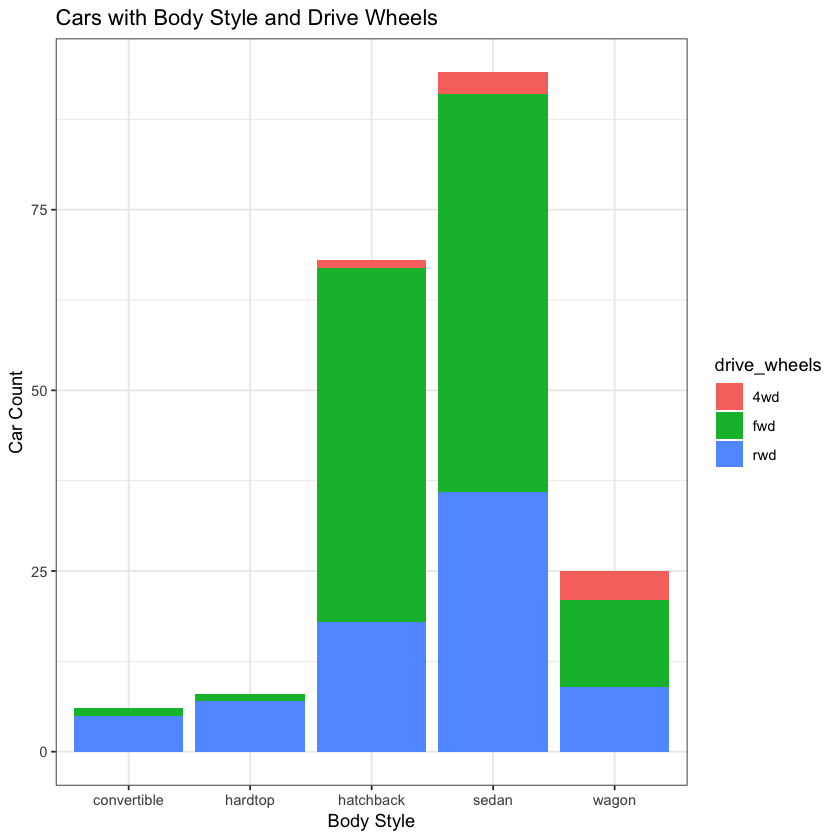

In [34]:
# Bar plot fill by another categorical variable
ggplot(df, aes(x = body_style, fill = drive_wheels )) + geom_bar() +
       theme_bw()+
       labs(x = 'Body Style', y = 'Car Count', title = 'Cars with Body Style and Drive Wheels' )
 

#### Box Plot

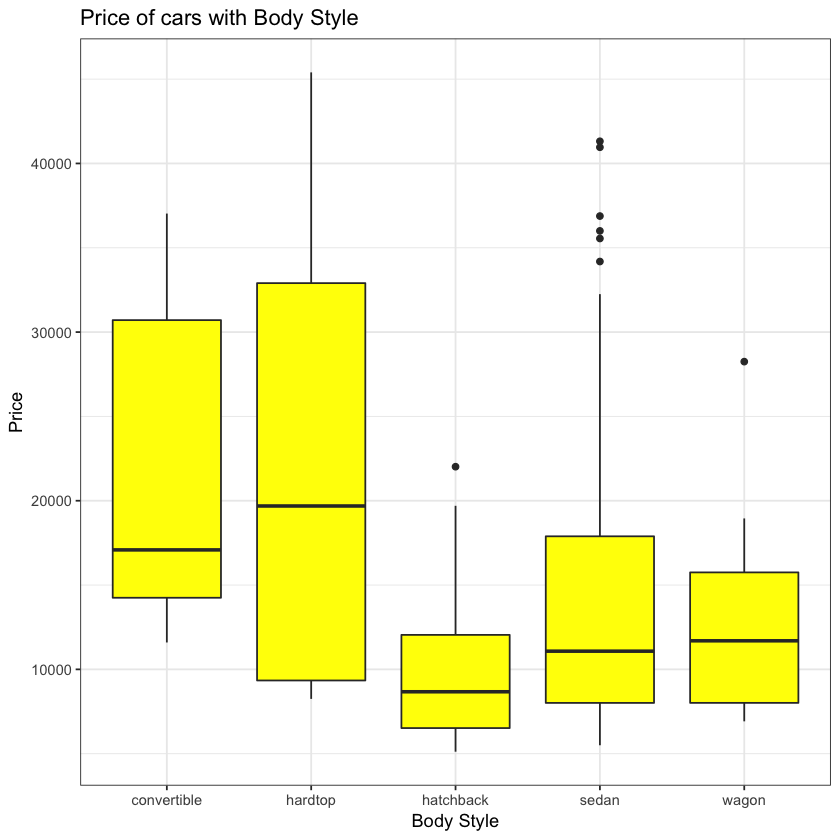

In [35]:
#Box Plot
ggplot(df, aes(x = body_style, y = price)) + geom_boxplot(fill = 'yellow') + 
      theme_bw()+
      labs(x = 'Body Style', y = 'Price', title = 'Price of cars with Body Style' )
 

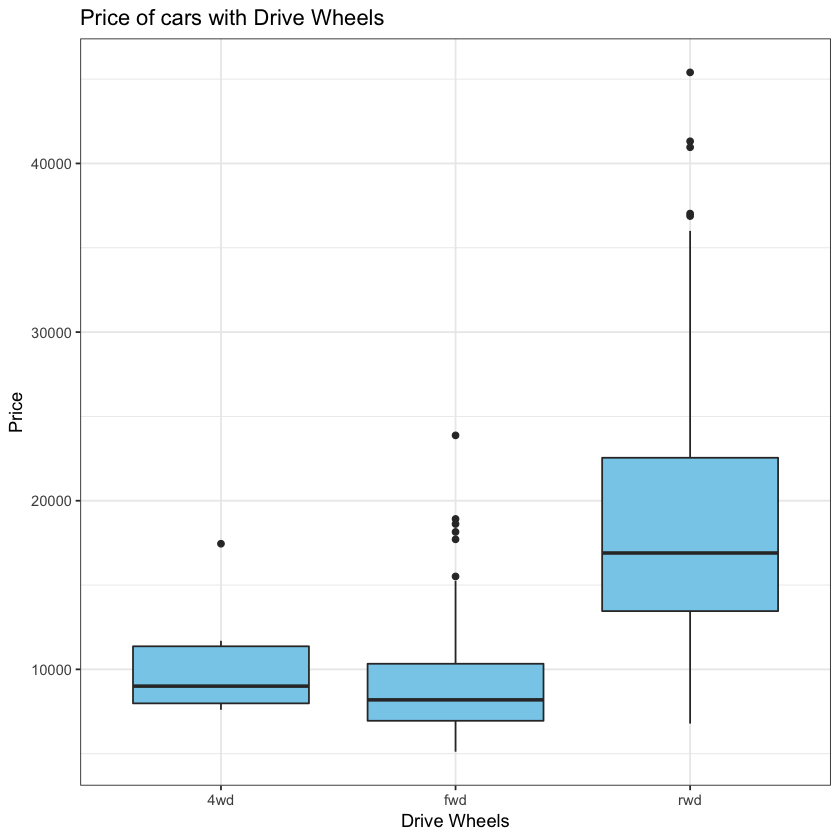

In [36]:
#Box Plot
ggplot(df, aes(x = drive_wheels, y = price)) + geom_boxplot(fill = 'skyblue') + 
      theme_bw()+
      labs(x = 'Drive Wheels', y = 'Price', title = 'Price of cars with Drive Wheels' )
 

#### Vilon Plot

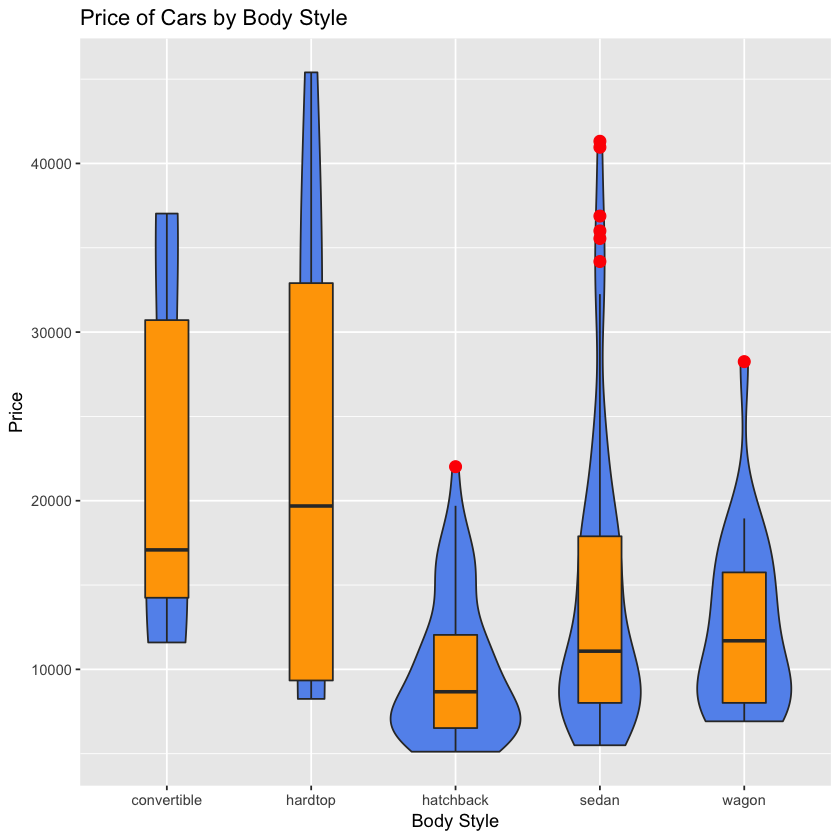

In [52]:
# Vilon Plot 
ggplot(df, aes(x = body_style, y = price)) +
       geom_violin(fill = "cornflowerblue") +
       geom_boxplot(width = .3, fill = "orange", outlier.color = "red", outlier.size = 3) +
       labs(x = "Body Style", y = "Price", title = "Price of Cars by Body Style")


#### Histogram

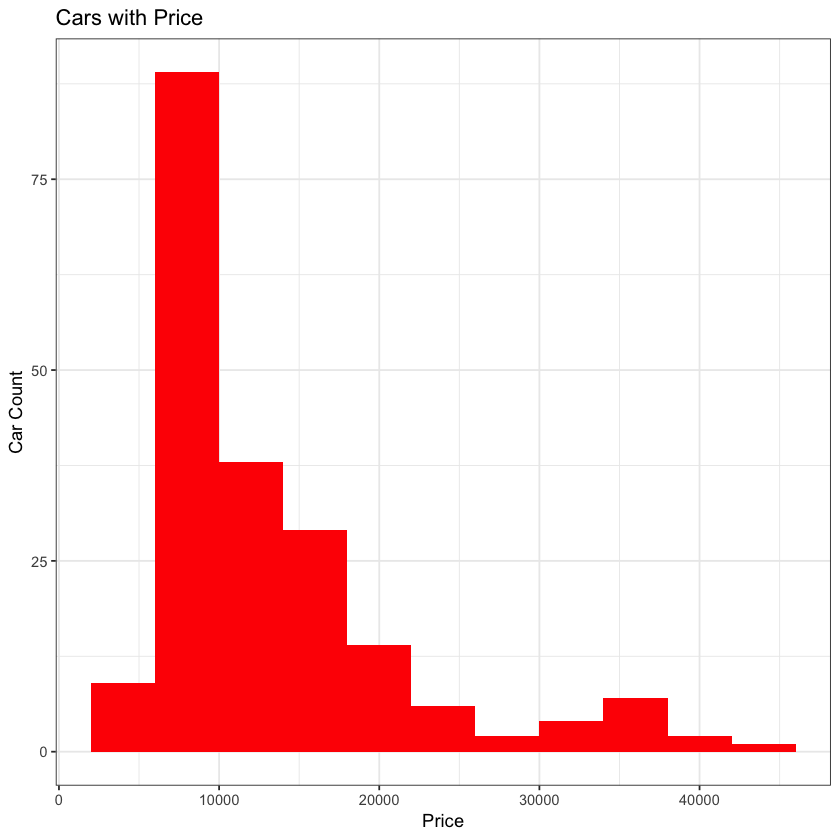

In [53]:
# Simple HISTOGRAM
ggplot(df, aes(x = price)) +  geom_histogram(fill = 'red', binwidth = 4000) + 
       theme_bw()+
       labs(x = 'Price', y = 'Car Count', title = 'Cars with Price' )


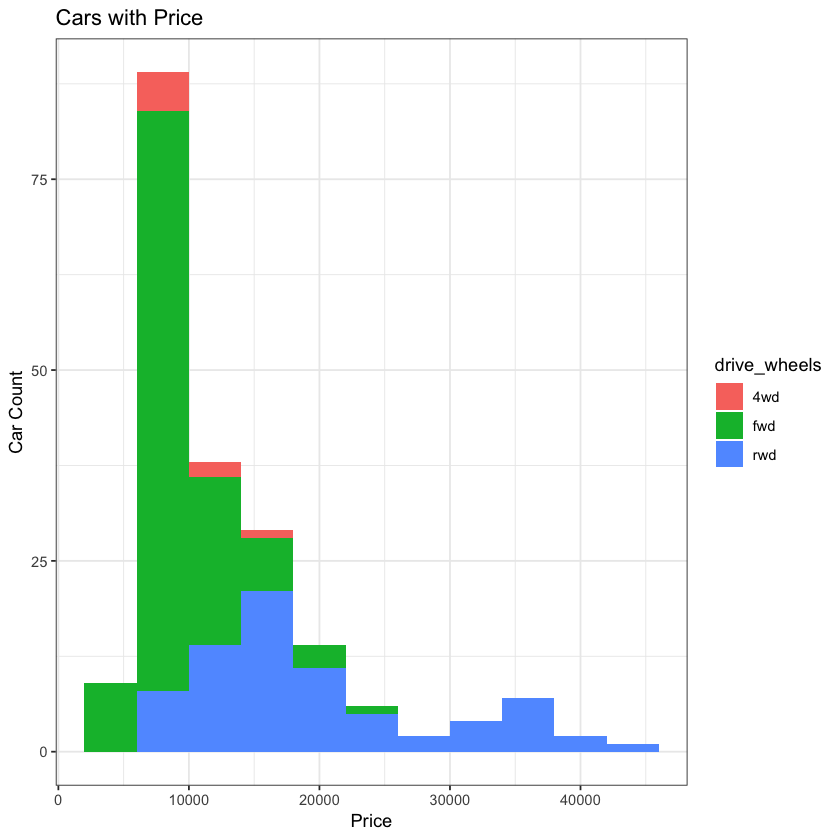

In [54]:
# HISTOGRAM with Category
ggplot(df, aes(x = price, fill= drive_wheels)) +  geom_histogram(binwidth = 4000) + 
       theme_bw()+
       labs(x = 'Price', y = 'Car Count', title = 'Cars with Price' )


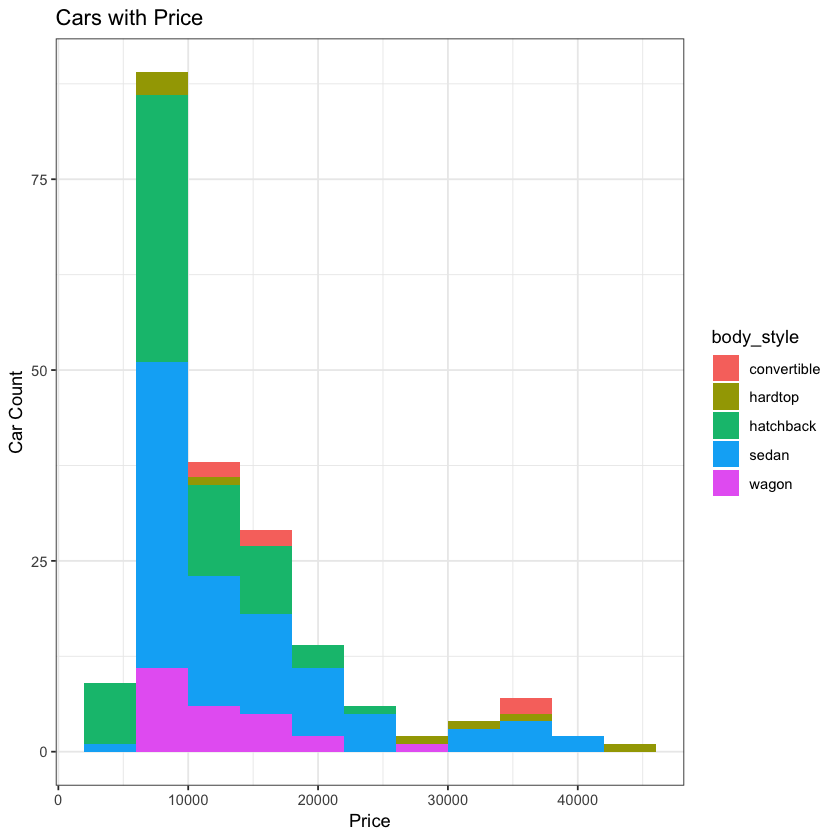

In [55]:
#HISTOGRAM with Category
ggplot(df, aes(x = price, fill= body_style)) +  geom_histogram(binwidth = 4000) + 
       theme_bw()+
       labs(x = 'Price', y = 'Car Count', title = 'Cars with Price' )


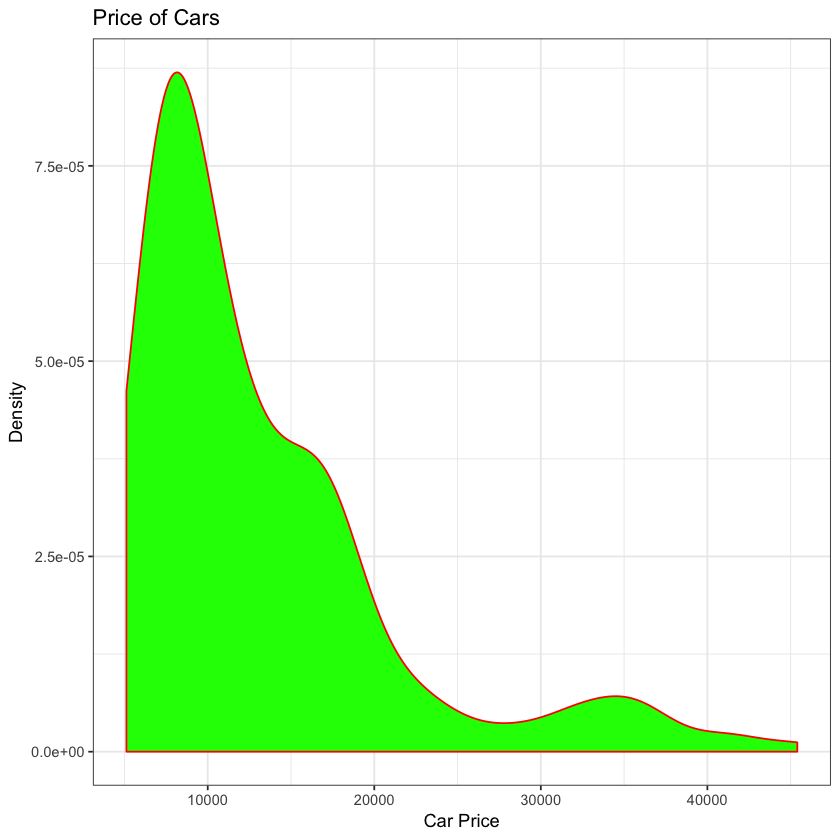

In [56]:
# Density plot
ggplot(df, aes(x = price)) +  geom_density(color = 'red', fill = 'green') + 
       theme_bw()+
       labs(x = 'Car Price', y = 'Density', title = 'Price of Cars' )


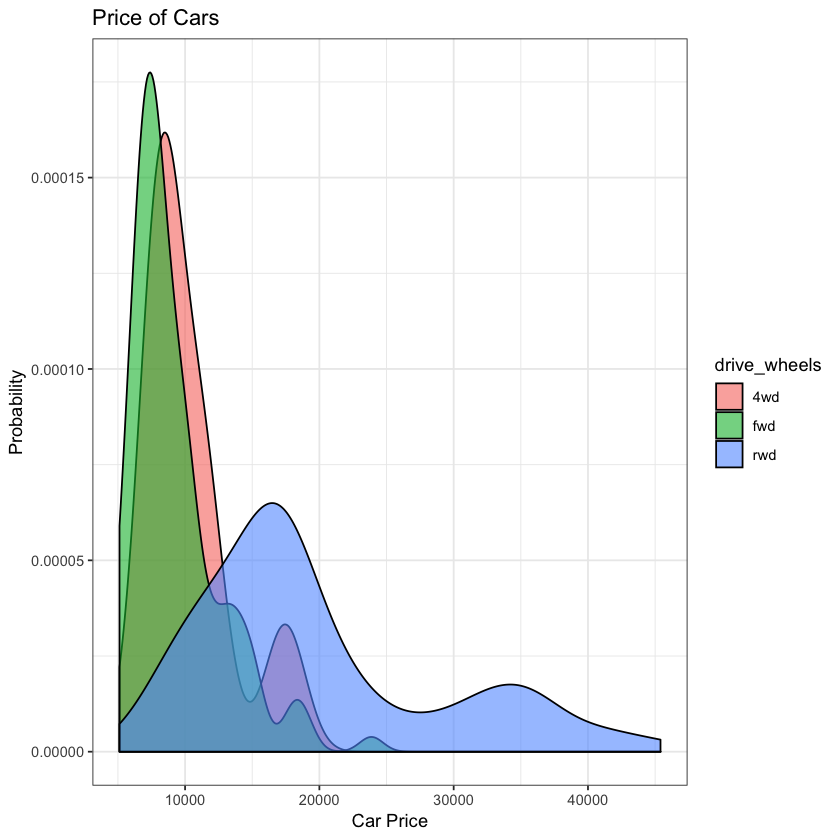

In [57]:
# Density plot fill by another categorical variable
ggplot(df, aes(x = price, fill = drive_wheels)) +  geom_density(alpha = 0.6) + 
       theme_bw()+
       labs(x = 'Car Price', y = 'Probability', title = 'Price of Cars' )


#### Correlation plots

In [58]:
# Creating data frame of numeric variabls
df2 <- dplyr::select_if(df, is.numeric)
# calulate the correlations
corln <- cor(df2, use="complete.obs")
round(corln, 2)

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
symboling,1.00,0.47,-0.54,-0.37,-0.24,-0.55,-0.23,-0.11,-0.14,-0.01,-0.18,0.08,0.28,-0.04,0.04,-0.08
normalized_losses,0.47,1.00,-0.06,0.02,0.09,-0.37,0.10,0.11,-0.03,0.06,-0.11,0.22,0.24,-0.23,-0.18,0.13
wheel_base,-0.54,-0.06,1.00,0.88,0.81,0.59,0.78,0.57,0.49,0.16,0.25,0.37,-0.36,-0.47,-0.54,0.58
length,-0.37,0.02,0.88,1.00,0.86,0.49,0.88,0.69,0.61,0.12,0.16,0.58,-0.29,-0.67,-0.70,0.69
width,-0.24,0.09,0.81,0.86,1.00,0.31,0.87,0.73,0.54,0.19,0.19,0.62,-0.25,-0.63,-0.68,0.75
height,-0.55,-0.37,0.59,0.49,0.31,1.00,0.31,0.07,0.18,-0.06,0.26,-0.09,-0.31,-0.05,-0.10,0.14
curb_weight,-0.23,0.10,0.78,0.88,0.87,0.31,1.00,0.85,0.64,0.17,0.16,0.76,-0.28,-0.75,-0.79,0.83
engine_size,-0.11,0.11,0.57,0.69,0.73,0.07,0.85,1.00,0.57,0.21,0.03,0.82,-0.26,-0.65,-0.68,0.87
bore,-0.14,-0.03,0.49,0.61,0.54,0.18,0.64,0.57,1.00,-0.06,0.00,0.57,-0.27,-0.58,-0.59,0.54
stroke,-0.01,0.06,0.16,0.12,0.19,-0.06,0.17,0.21,-0.06,1.00,0.19,0.10,-0.06,-0.03,-0.03,0.08


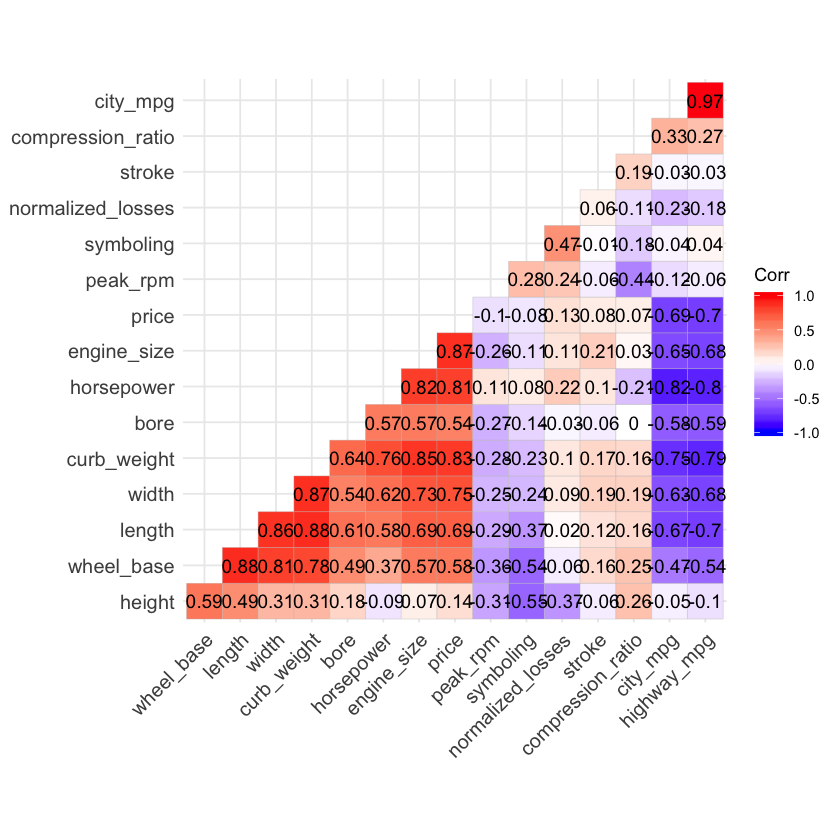

In [59]:
# Correlation Plot
ggcorrplot(corln, hc.order = TRUE, type = "lower", lab = TRUE)

#### Scatter plot and Regression Line

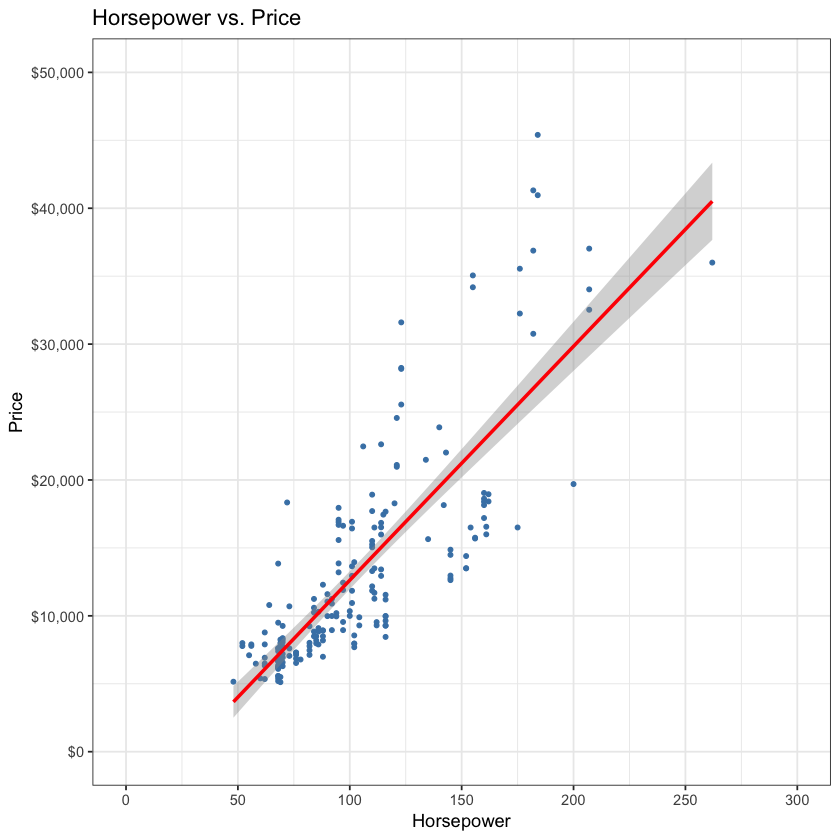

In [60]:
# Enhanced Linear Regression
ggplot(df, aes(x = horsepower, y = price)) +
     geom_point(color="steelblue", size = 1) +
     geom_smooth(method = "lm", color = 'red')+
     theme_bw()+
     scale_y_continuous(label = scales::dollar, limits = c(0, 50000)) +
     scale_x_continuous(breaks = seq(0, 300, 50), limits=c(0, 300)) + 
     labs(x = "Horsepower", y = "Price", title = "Horsepower vs. Price")


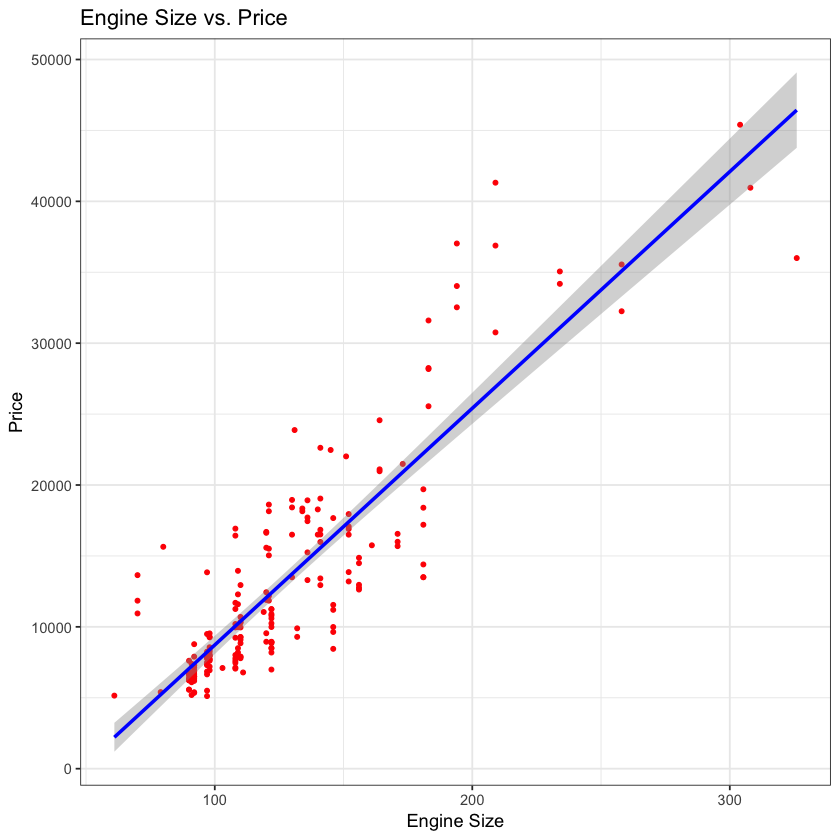

In [61]:
# Enhanced Linear Regression
ggplot(df, aes(x = engine_size, y = price)) +
     geom_point(color="red", size = 1) +
     geom_smooth(method = "lm", color = 'blue')+
     theme_bw()+
     labs(x = "Engine Size", y = "Price", title = "Engine Size vs. Price")


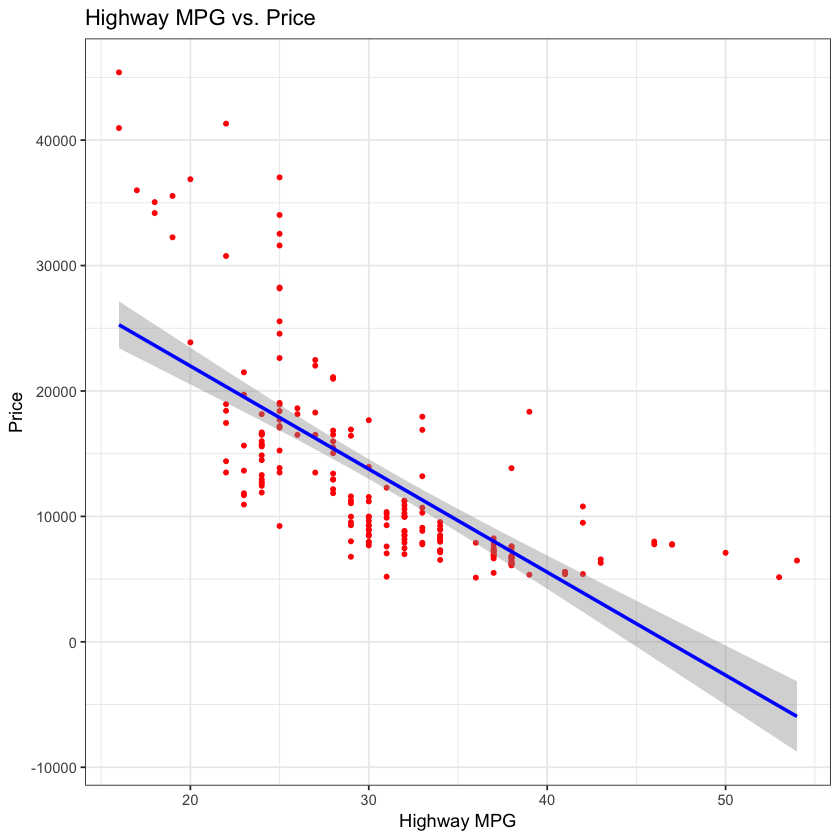

In [62]:
# Enhanced Linear Regression
ggplot(df, aes(x = highway_mpg, y = price)) +
     geom_point(color="red", size = 1) +
     geom_smooth(method = "lm", color = 'blue')+
     theme_bw()+
     labs(x = "Highway MPG", y = "Price", title = "Highway MPG vs. Price")


#### wheel-base VS price

In [67]:
# pearson's correlation coeff
r1 <- cor.test(df$wheel_base, df$price, method = "pearson")
r1 


	Pearson's product-moment correlation

data:  df$wheel_base and df$price
t = 10.166, df = 199, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.4855322 0.6689138
sample estimates:
      cor 
0.5846418 


[1] 8.076488e-20

In [64]:
# p - value
r1$p.value

[1] 8.076488e-20

Conclusion: Since the p-value is < 0.001, the correlation between wheel-base and price is statistically significant, although the linear relationship isn't extremely strong (~0.585)

#### Length vs Price

In [69]:
# pearson's correlation coeff
r2 <- cor.test(df$length, df$price, method = "pearson")
r2 


	Pearson's product-moment correlation

data:  df$length and df$price
t = 13.471, df = 199, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6105938 0.7566984
sample estimates:
      cor 
0.6906284 


In [70]:
# p - value
r2$p.value

[1] 8.016477e-30

Since the p-value is < 0.001, the correlation between length and price is statistically significant, and the linear relationship is moderately strong (~0.691).

#### Width vs Price

In [71]:
# pearson's correlation coeff
r3 <- cor.test(df$width, df$price, method = "pearson")
r3 


	Pearson's product-moment correlation

data:  df$width and df$price
t = 16.057, df = 199, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6839854 0.8058726
sample estimates:
      cor 
0.7512653 


In [72]:
# p - value
r3$p.value

[1] 9.200336e-38

Conclusion:Since the p-value is < 0.001, the correlation between width and price is statistically significant, and the linear relationship is quite strong (~0.751).

#### Curb weight vs Price

In [73]:
# pearson's correlation coeff
r4 <- cor.test(df$curb_weight, df$price, method = "pearson")
r4 


	Pearson's product-moment correlation

data:  df$curb_weight and df$price
t = 21.357, df = 199, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.7868886 0.8721003
sample estimates:
      cor 
0.8344145 


In [74]:
# p - value
r4$p.value

[1] 2.189577e-53

Conclusion:

Since the p-value is  < 0.001, the correlation between curb-weight and price is statistically significant, and the linear relationship is quite strong (~0.834).

#### bore vs Price

In [75]:
# pearson's correlation coeff
r5 <- cor.test(df$bore, df$price, method = "pearson")
r5 


	Pearson's product-moment correlation

data:  df$bore and df$price
t = 9.1256, df = 199, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.4376595 0.6338999
sample estimates:
      cor 
0.5431554 


In [76]:
# p - value
r5$p.value

[1] 8.049189e-17

Conclusion:

Since the p-value is  <0.001, the correlation between bore and price is statistically significant, but the linear relationship is only moderate (~0.521).

#### horsepower VS price

In [77]:
# pearson's correlation coeff
r6 <- cor.test(df$horsepower, df$price, method = "pearson")
r6 


	Pearson's product-moment correlation

data:  df$horsepower and df$price
t = 19.455, df = 199, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.7558679 0.8524591
sample estimates:
      cor 
0.8095746 


In [78]:
# p - value
r6$p.value

[1] 6.369057e-48

Conclusion:

Since the p-value is < 0.001, the correlation between horsepower and price is statistically significant, and the linear relationship is quite strong (~0.809, close to 1)

#### engine size vs price

In [79]:
# pearson's correlation coeff
r7 <- cor.test(df$engine_size, df$price, method = "pearson")
r7


	Pearson's product-moment correlation

data:  df$engine_size and df$price
t = 25.17, df = 199, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8347124 0.9018523
sample estimates:
      cor 
0.8723352 


In [80]:
# p - value
r7$p.value

[1] 9.265492e-64

Conclusion:

Since the p-value is < 0.001, the correlation between engine-size and price is statistically significant, and the linear relationship is very strong (~0.872).

#### city mpg VS price

In [81]:
# pearson's correlation coeff
r8 <- cor.test(df$city_mpg, df$price, method = "pearson")
r8 


	Pearson's product-moment correlation

data:  df$city_mpg and df$price
t = -13.321, df = 199, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.7533811 -0.6057316
sample estimates:
      cor 
-0.686571 


In [82]:
# p - value
r8$p.value

[1] 2.321132e-29

Conclusion:

Since the p-value is  <0.001, the correlation between city-mpg and price is statistically significant, and the coefficient of ~ -0.687 shows that the relationship is negative and moderately strong.

#### highway mpg VS price

In [83]:
# pearson's correlation coeff
r9 <- cor.test(df$highway_mpg, df$price, method = "pearson")
r9 


	Pearson's product-moment correlation

data:  df$highway_mpg and df$price
t = -14.011, df = 199, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.7681706 -0.6274944
sample estimates:
       cor 
-0.7046923 


In [84]:
# p - value
r9$p.value

[1] 1.749547e-31

Conclusion:

Since the p-value is < 0.001, the correlation between highway-mpg and price is statistically significant, and the coefficient of ~ -0.705 shows that the relationship is negative and moderately strong.

#### ANOVA: Analysis of Variance

The Analysis of Variance (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters:

F-test score: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.

P-value: P-value tells how statistically significant is our calculated score value.

If our price variable is strongly correlated with the variable we are analyzing, expect ANOVA to return asizeable F-test score and a small p-value.

#### Drive Wheels

In [85]:
one.way <- aov(price ~ drive_wheels, data = df)
summary(one.way)

              Df    Sum Sq   Mean Sq F value Pr(>F)    
drive_wheels   2 5.141e+09 2.571e+09   67.95 <2e-16 ***
Residuals    198 7.490e+09 3.783e+07                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [86]:
one.way <- aov(price ~ body_style, data = df)
summary(one.way)

             Df    Sum Sq   Mean Sq F value   Pr(>F)    
body_style    4 1.984e+09 495911393   9.129 8.78e-07 ***
Residuals   196 1.065e+10  54324118                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

#### Conclusion: Important Variables

We now have a better idea of what our data looks like and which variables are important to take into account when predicting the car price. We have narrowed it down to the following variables:

Continuous numerical variables:

 - Length
 - Width
 - Curb-weight
 - Engine-size
 - Horsepower
 - City-mpg
 - Highway-mpg
 - Wheel-base
 - Bore

Categorical variables:
 - Drive-wheels
 - Body style

### Model Development
#### Multiple Linear Regression

In [88]:
model <- lm(price ~  length + width + curb_weight + engine_size + horsepower + city_mpg +
                     highway_mpg + wheel_base + bore, data = df)
summary(model)


Call:
lm(formula = price ~ length + width + curb_weight + engine_size + 
    horsepower + city_mpg + highway_mpg + wheel_base + bore, 
    data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-8271.8 -1644.5    -5.2  1471.0 14324.2 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -19927.659  11868.005  -1.679 0.094766 .  
length        -891.036    732.679  -1.216 0.225434    
width         1334.130    562.540   2.372 0.018705 *  
curb_weight      3.120      1.666   1.873 0.062612 .  
engine_size     79.072     14.228   5.557 9.12e-08 ***
horsepower      59.385     17.451   3.403 0.000812 ***
city_mpg      -170.103    189.265  -0.899 0.369915    
highway_mpg    184.020    176.973   1.040 0.299737    
wheel_base     111.785    103.573   1.079 0.281821    
bore         -1026.438   1236.247  -0.830 0.407414    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3459 on 191 degrees of freedom
Multiple R-

#### Interpretation

The first step in interpreting the multiple regression analysis is to examine the F-statistic and the associated p-value, at the bottom of model summary.

In our example, it can be seen that p-value of the F-statistic is < 2.2e-16, which is highly significant. This means that, at least, one of the predictor variables is significantly related to the outcome variable.

To see which predictor variables are significant, we can examine the coefficients table, which shows the estimate of regression beta coefficients and the associated t-statitic p-values:

In [89]:
summary(model)$coefficient

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-19927.659006,11868.005027,-1.6791077,9.476618e-02
length,-891.036354,732.678998,-1.2161347,2.254344e-01
width,1334.129965,562.540472,2.3716160,1.870508e-02
curb_weight,3.119551,1.665641,1.8728830,6.261244e-02
engine_size,79.071613,14.228390,5.5573126,9.115986e-08
horsepower,59.385404,17.451100,3.4029604,8.120796e-04
city_mpg,-170.102788,189.264841,-0.8987553,3.699146e-01
highway_mpg,184.019817,176.972551,1.0398212,2.997374e-01
wheel_base,111.785381,103.573356,1.0792870,2.818208e-01
bore,-1026.437609,1236.247394,-0.8302850,4.074143e-01


For a given the predictor, the t-statistic evaluates whether or not there is significant association between the predictor and the outcome variable, that is whether the beta coefficient of the predictor is significantly different from zero.

It can be seen that, changing in length, width, engine_size, horsepower are significantly associated to changes in price while changes in curb_weight, city_mpg, highway_mpg, wheel_base,bore,  is not significantly associated with price.


In [91]:
model1 <- lm(price ~  length + width + engine_size + horsepower, data = df)
summary(model1)


Call:
lm(formula = price ~ length + width + engine_size + horsepower, 
    data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-8616.7 -1855.7     8.1  1338.9 14208.1 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -4276.09    1146.49  -3.730 0.000251 ***
length        120.86     483.18   0.250 0.802740    
width        1790.44     514.57   3.479 0.000619 ***
engine_size    90.44      12.05   7.505 2.10e-12 ***
horsepower     58.11      11.55   5.029 1.11e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3468 on 196 degrees of freedom
Multiple R-squared:  0.8134,	Adjusted R-squared:  0.8096 
F-statistic: 213.6 on 4 and 196 DF,  p-value: < 2.2e-16


In [92]:
summary(model1)$coefficient

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-4276.08929,1146.49487,-3.7297064,2.509272e-04
length,120.86278,483.17690,0.2501419,8.027396e-01
width,1790.44286,514.57361,3.4794689,6.190735e-04
engine_size,90.44047,12.05063,7.5050399,2.101075e-12
horsepower,58.10645,11.55339,5.0293845,1.108059e-06


#### Model accuracy assessment

As we have seen in simple linear regression, the overall quality of the model can be assessed by examining the R-squared (R2) and Residual Standard Error (RSE).

#### R-squared:

In multiple linear regression, the R^2 represents the correlation coefficient between the observed values of the outcome variable (y) and the fitted (i.e., predicted) values of y. For this reason, the value of R will always be positive and will range from zero to one. Value of R^2 nearer to 1 means better the model.

In [101]:
model2 <- lm(price ~  length + width + curb_weight + engine_size + horsepower +
                     highway_mpg + wheel_base, data = df)
summary(model2)


Call:
lm(formula = price ~ length + width + curb_weight + engine_size + 
    horsepower + highway_mpg + wheel_base, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-8130.0 -1509.1   -67.9  1468.8 14417.9 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -20680.195  10924.360  -1.893 0.059850 .  
length        -786.848    691.526  -1.138 0.256597    
width         1360.331    559.671   2.431 0.015989 *  
curb_weight      2.805      1.642   1.708 0.089157 .  
engine_size     76.650     14.022   5.467 1.41e-07 ***
horsepower      63.492     16.432   3.864 0.000152 ***
highway_mpg     44.700     73.795   0.606 0.545403    
wheel_base      91.679    100.823   0.909 0.364323    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3454 on 193 degrees of freedom
Multiple R-squared:  0.8177,	Adjusted R-squared:  0.8111 
F-statistic: 123.7 on 7 and 193 DF,  p-value: < 2.2e-16


Thus the model 

price = -20680.195 + -786.848xlength + 1360.331x width + 2.805x curb_weight + 
                   76.650x engine_size + 63.492x horsepower + 44.700x highway_mpg +
                   91.679x wheel_base
                     
seems best so far.

In [106]:
#Prdiction using model
predictions = predict.lm(model2, df)
predictions[1:5]

1        2        3        4        5 
11994.45 11994.45 18431.36 11243.81 15239.78

In [108]:
# actual values
df$price[1:5]

[1] 13495 16500 16500 13950 17450

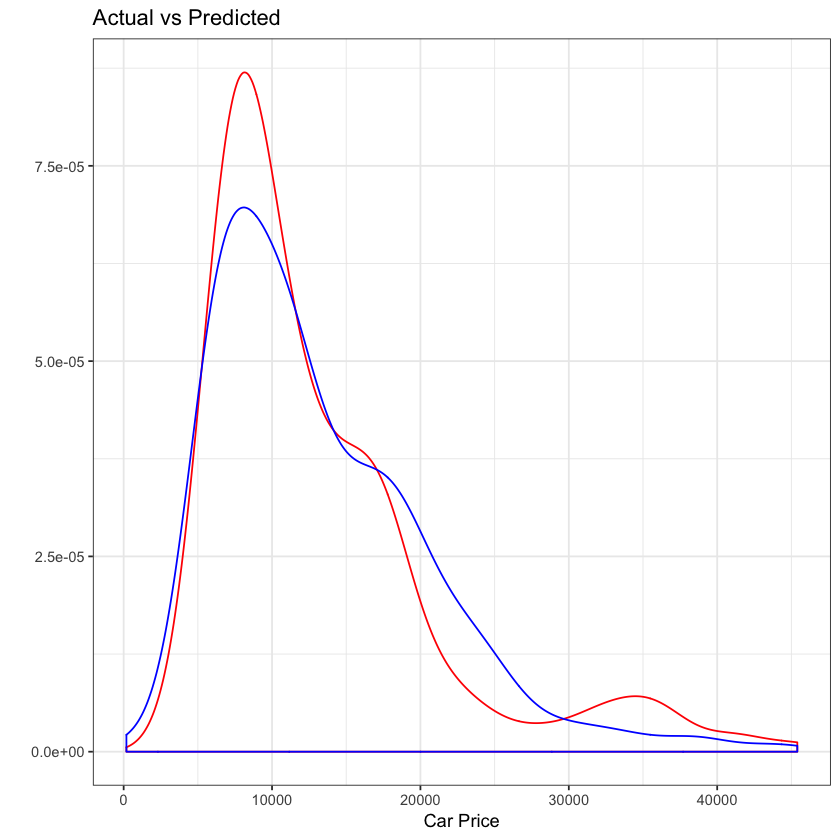

In [127]:
# Distribution plot
ggplot() +  geom_density(aes(x = df$price), color = 'red') +  
            geom_density(aes(x = predictions), color = 'blue') + 
            theme_bw()+
            labs(x = 'Car Price', y = '', title = 'Actual vs Predicted')+
            scale_color_identity(name = "Model fit",
                          breaks = c("red", "blue"),
                          labels = c("Actual", "Predicted"),
                          guide = "legend")